# Explore here

In [1]:
import pandas as pd

# Cargar datos
sales_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv", parse_dates=["date"])
sales_df.set_index("date", inplace=True)
sales_df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


Tensor temporal: 1 days 00:00:00


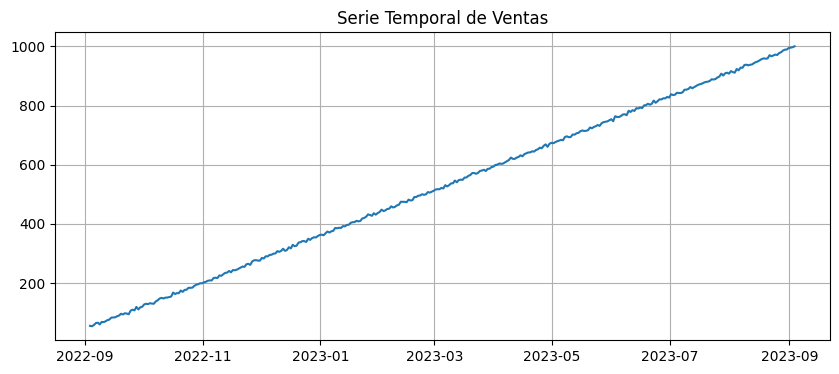

In [2]:
import matplotlib.pyplot as plt

# Verificar frecuencia
time_diffs = sales_df.index.to_series().diff().dropna()
print("Tensor temporal:", time_diffs.mode()[0])

# Graficar serie
plt.figure(figsize=(10,4))
plt.plot(sales_df['sales'])
plt.title("Serie Temporal de Ventas")
plt.grid()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_df['sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063
Critical Value (1%): -3.4490648539347544
Critical Value (5%): -2.8697861692116478
Critical Value (10%): -2.5711631253228306


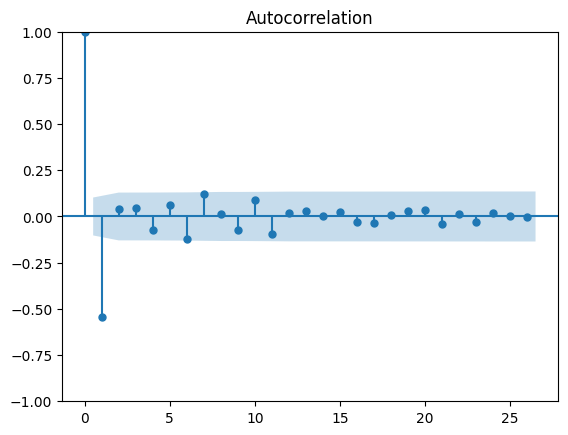

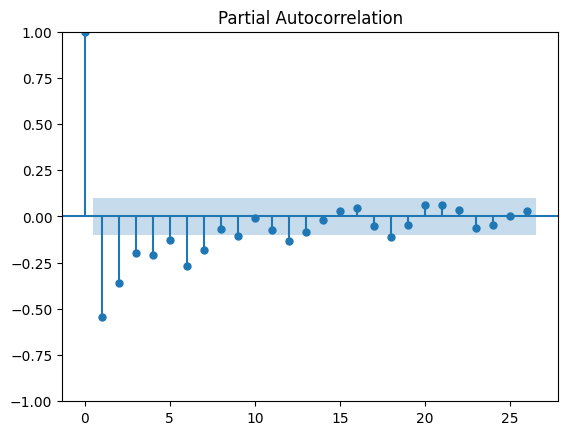

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

sales_diff = sales_df['sales'].diff().dropna()
plot_acf(sales_diff)
plot_pacf(sales_diff)
plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar modelo ARIMA(2,1,2)
model = ARIMA(sales_df['sales'], order=(2, 1, 2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -922.450
Date:                Mon, 16 Jun 2025   AIC                           1854.900
Time:                        19:22:54   BIC                           1874.400
Sample:                    09-03-2022   HQIC                          1862.649
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9074      0.011     85.349      0.000       0.887       0.928
ar.L2          0.0926      0.011      8.715      0.000       0.072       0.113
ma.L1         -1.9093      0.025    -75.556      0.000      -1.959      -1.860
ma.L2          0.9101      0.025     36.659      0.000       0.861       0.959
sigma2         8.8471      0.700     12.645      0.000       7.476      10.218
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.81   Prob(JB):                         0.45
Heteroskedasticity (H):               0.91   Skew:                             0.08
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE: 2.061165592417702
RMSE: 2.5777533937692763


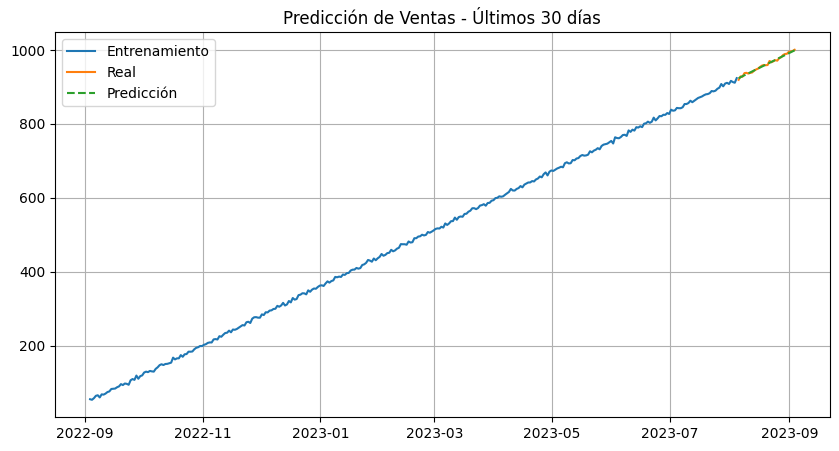

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separar train/test
train = sales_df.iloc[:-30]
test = sales_df.iloc[-30:]

model_train = ARIMA(train['sales'], order=(2, 1, 2))
model_fit_train = model_train.fit()
forecast = model_fit_train.forecast(steps=30)

# Evaluación
mae = mean_absolute_error(test['sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
print("MAE:", mae)
print("RMSE:", rmse)

# Visualización
plt.figure(figsize=(10,5))
plt.plot(train['sales'], label='Entrenamiento')
plt.plot(test.index, test['sales'], label='Real')
plt.plot(test.index, forecast, label='Predicción', linestyle='--')
plt.legend()
plt.title("Predicción de Ventas - Últimos 30 días")
plt.grid()
plt.show()

In [8]:
import joblib

joblib.dump(model_fit, "arima_ventas_model.pkl")
print("Modelo guardado como arima_ventas_model.pkl")

Modelo guardado como arima_ventas_model.pkl
